In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Rescaling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
 #       print(os.path.join(dirname, filename))
        


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
# Définir les chemins vers les dossiers contenant les données d'entraînement, de test et de validation
base_dir = '/kaggle/input/fruits/fruits-360_dataset/fruits-360'
train_data_dir = f'{base_dir}/Training'
test_data_dir = f'{base_dir}/Test'
test_multiple_fruits_dir  = f'{base_dir}/test-multiple_fruits'

In [8]:
# Définir les paramètres du modèle
input_shape = (100, 100, 3)  # Dimensions des images d'entrée
num_classes = len(os.listdir(train_data_dir))  # Nombre de classes (types de fruits)

In [9]:
# Créer les générateurs de données à partir des dossiers
train_datagen = ImageDataGenerator(rescale=1./255)  # Prétraitement des images d'entraînement
test_datagen = ImageDataGenerator(rescale=1./255)   # Prétraitement des images de test/validation

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Charger les images de test-multiple-fruits sans étiquettes
test_multiple_fruits_generator = test_datagen.flow_from_directory(
    test_multiple_fruits_dir,
    target_size=(100, 100),
    batch_size=1,
    class_mode=None,
    shuffle=False)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.
Found 0 images belonging to 0 classes.


In [11]:
# Créer le modèle

model = Sequential() #step 1

model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same')) #step2
model.add(Activation('relu'))  # step3
model.add(MaxPooling2D(pool_size=2)) #step4

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 32
model.add(MaxPooling2D(pool_size=2)) #repeating step 4 again

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 64
model.add(MaxPooling2D(pool_size=2)) #repeating step 4 again

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 64
model.add(MaxPooling2D(pool_size=2)) #repeating step 4 again

model.add(Dropout(0.3)) # step5
model.add(Flatten()) #step 6
model.add(Dense(150)) #step 7
model.add(Activation('relu')) # setp 3
model.add(Dropout(0.4)) # step 5
model.add(Dense(num_classes,activation = 'softmax')) # setp3 and step7. but this time, we are using activation function as softmax (if we train on two classes then we set sigmoid)

In [12]:
# Compiler le modèle
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Entraîner le modèle
history = model.fit(train_generator,
        batch_size = 32,
        epochs=30,
        validation_data=test_generator,
        verbose=2, shuffle=True)

# Évaluer le modèle sur les données de test
#test_loss, test_acc = model.evaluate(test_generator)
#print('Test accuracy:', test_acc)

Epoch 1/30
2116/2116 - 140s - loss: 0.0377 - accuracy: 0.9902 - val_loss: 0.2038 - val_accuracy: 0.9811 - 140s/epoch - 66ms/step
Epoch 2/30
2116/2116 - 107s - loss: 0.0395 - accuracy: 0.9903 - val_loss: 0.1706 - val_accuracy: 0.9812 - 107s/epoch - 51ms/step
Epoch 3/30
2116/2116 - 108s - loss: 0.0365 - accuracy: 0.9908 - val_loss: 0.2076 - val_accuracy: 0.9773 - 108s/epoch - 51ms/step
Epoch 4/30
2116/2116 - 105s - loss: 0.0359 - accuracy: 0.9913 - val_loss: 0.1792 - val_accuracy: 0.9804 - 105s/epoch - 50ms/step
Epoch 5/30
2116/2116 - 106s - loss: 0.0327 - accuracy: 0.9917 - val_loss: 0.1946 - val_accuracy: 0.9816 - 106s/epoch - 50ms/step
Epoch 6/30
2116/2116 - 122s - loss: 0.0348 - accuracy: 0.9924 - val_loss: 0.2034 - val_accuracy: 0.9838 - 122s/epoch - 58ms/step
Epoch 7/30
2116/2116 - 106s - loss: 0.0342 - accuracy: 0.9920 - val_loss: 0.1814 - val_accuracy: 0.9834 - 106s/epoch - 50ms/step
Epoch 8/30
2116/2116 - 112s - loss: 0.0336 - accuracy: 0.9923 - val_loss: 0.2188 - val_accuracy: 

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

In [44]:
model.save('/kaggle/working/modele.h5')

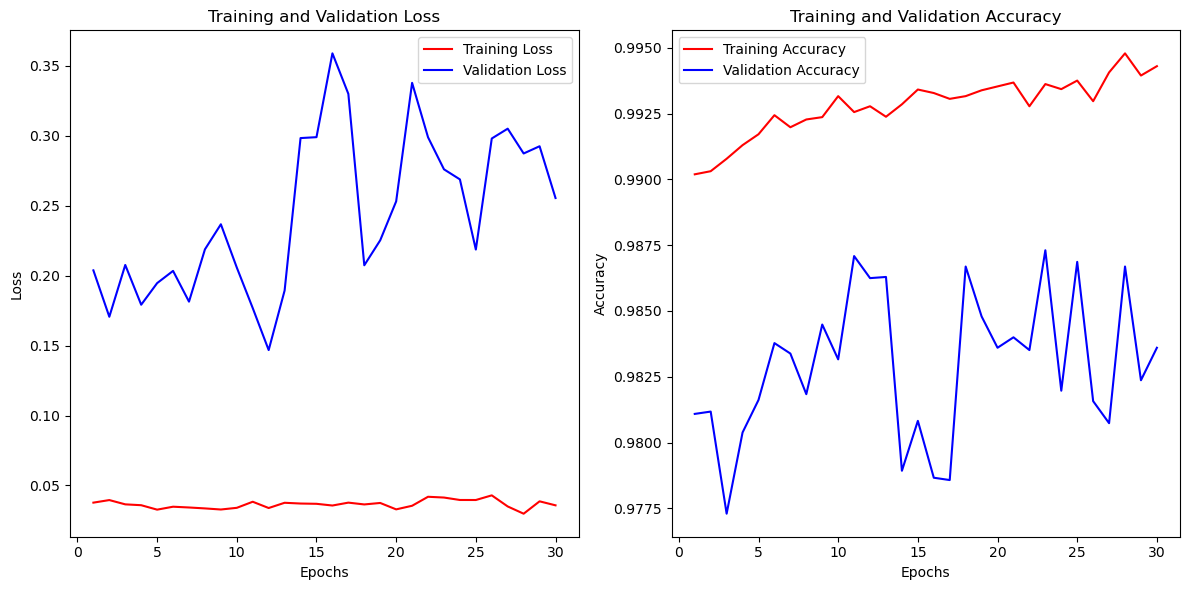

In [16]:
# Récupérer les métriques d'entraînement et de validation à chaque époque
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Afficher les graphiques légendés
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
image_paths = []

# Parcourir le dossier test-multiple-fruits pour récupérer les chemins des images
for root, dirs, files in os.walk(test_multiple_fruits_dir):
    for file in files:
        image_path = os.path.join(root, file)
        image_paths.append(image_path)

# Prétraitement des images de test-multiple-fruits
test_multiple_fruits_images = []
for image_path in image_paths:
    img = cv2.imread(image_path)
    img = cv2.resize(img, (input_shape[1], input_shape[0]))
    img = img / 255.0  # Normalisation des valeurs de pixels
    test_multiple_fruits_images.append(img)

# Conversion en tableau numpy
test_multiple_fruits_images = np.array(test_multiple_fruits_images)

In [ ]:
# Faire les prédictions sur les images de test-multiple-fruits
predictions = model.predict(test_multiple_fruits_images)

# Récupérer les noms des classes
class_names = sorted(train_generator.class_indices.keys())

In [43]:
# Afficher les prédictions
for i, prediction in enumerate(predictions):
    predicted_class_indices = tf.argmax(prediction).numpy()
    predicted_class = class_names[predicted_class_indices]
    image_name = os.path.basename(image_paths[i])
    print("Image:", image_name, "; Predicted:", predicted_class)

Image: raspberries6.jpg ; Predicted: Huckleberry
Image: cherries7.jpg ; Predicted: Mulberry
Image: tomatoes1.jpg ; Predicted: Corn Husk
Image: apple.jpg ; Predicted: Pepper Green
Image: cherries_wax4.jpg ; Predicted: Mulberry
Image: raspberry2.jpg ; Predicted: Mulberry
Image: pears1.jpg ; Predicted: Watermelon
Image: raspberry.jpg ; Predicted: Raspberry
Image: raspberry4.jpg ; Predicted: Huckleberry
Image: cherries2.jpg ; Predicted: Watermelon
Image: peaches.jpg ; Predicted: Watermelon
Image: apples1.jpg ; Predicted: Mulberry
Image: strawberries.jpg ; Predicted: Corn Husk
Image: cocos.jpg ; Predicted: Mulberry
Image: cherries_strawberries2.jpg ; Predicted: Huckleberry
Image: physalis1.jpg ; Predicted: Pepper Green
Image: apple_apricot_nectarine_peach_peach(flat)_pomegranate_pear_plum.jpg ; Predicted: Corn Husk
Image: pears2.jpg ; Predicted: Watermelon
Image: apples2.jpg ; Predicted: Watermelon
Image: Bananas(lady_finger)4.jpg ; Predicted: Corn Husk
Image: raspberries10.jpg ; Predicted: